In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
dataframe = pd.read_csv(r"covid19_tweets.csv")
dataframe.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
dataframe.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


In [9]:

print(dataframe.groupby('user_verified').size())

user_verified
False    65082
True      9354
dtype: int64


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


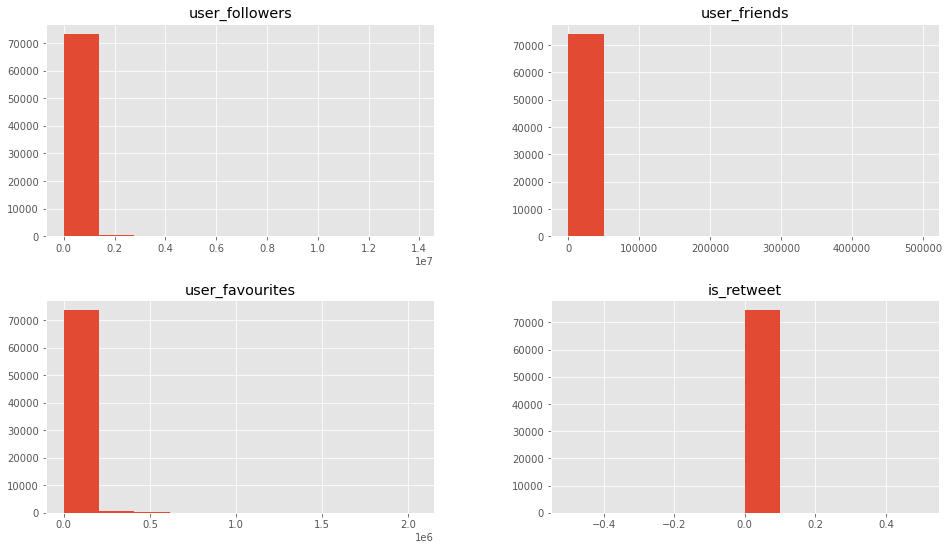

In [10]:
#Veremos graficamente nuestros datos para tener una idea de la dispersión de los mismos:
dataframe.drop(['user_verified'],1).hist()
plt.show()

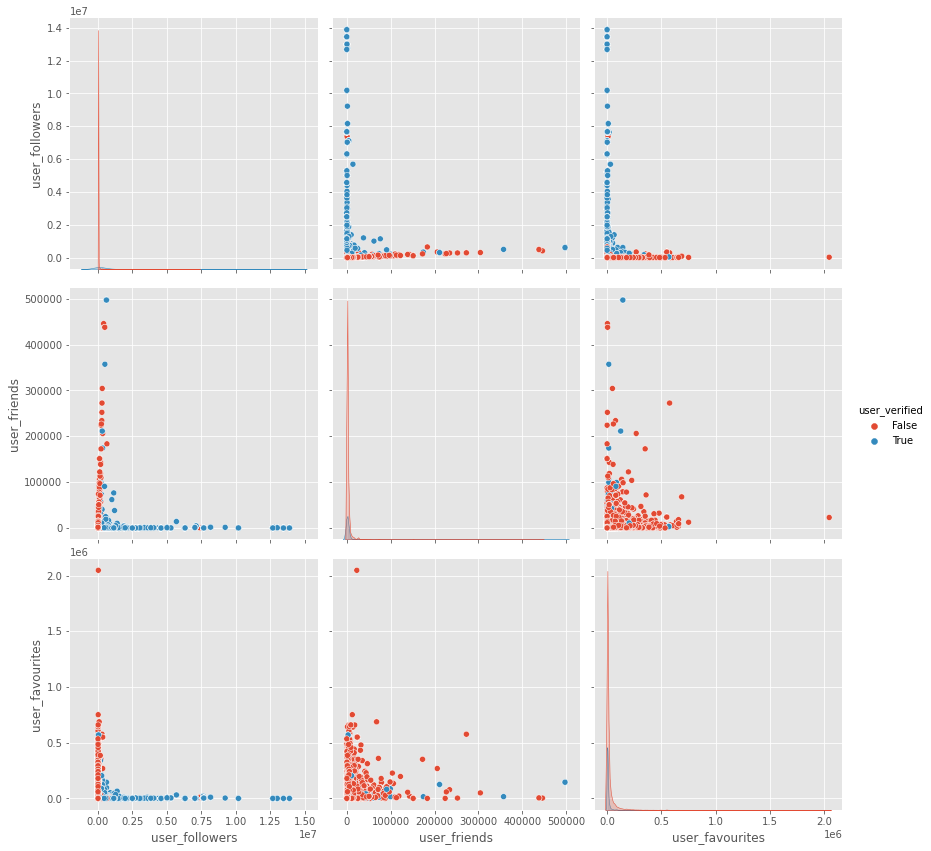

In [11]:
#En este caso seleccionamos 3 dimensiones: op, ex y ag y las cruzamos para ver si 
#nos dan alguna pista de su agrupación y la relación con sus categorías.

sb.pairplot(dataframe.dropna(), hue='user_verified',height=4,vars=["user_followers","user_friends","user_favourites"],kind='scatter')

In [12]:
#Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve, 
#sólo cargamos las columnas op, ex y ag en nuestra variable X.
X = np.array(dataframe[["user_followers","user_friends","user_favourites"]])
y = np.array(dataframe['user_verified'])
X.shape

(74436, 3)

C:\Users\Diego\.conda\envs\mine\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


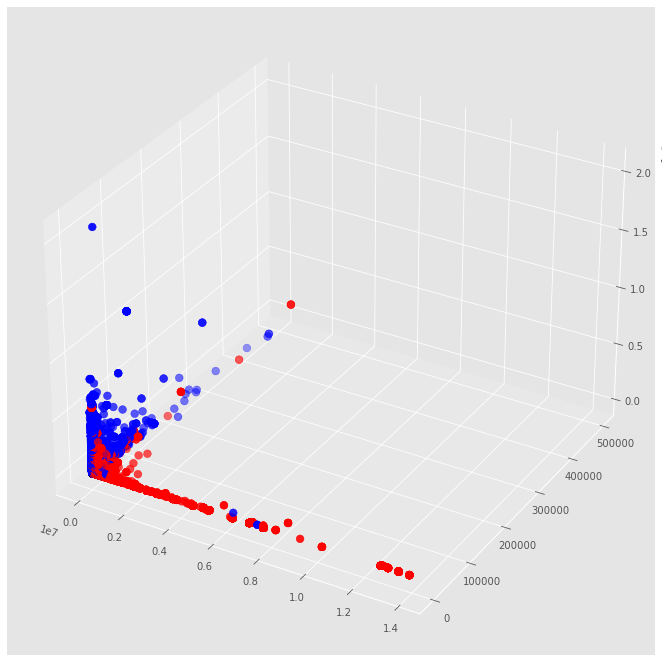

In [13]:
#Ahora veremos una gráfica en 3D con 9 colores representando las categorías.

fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

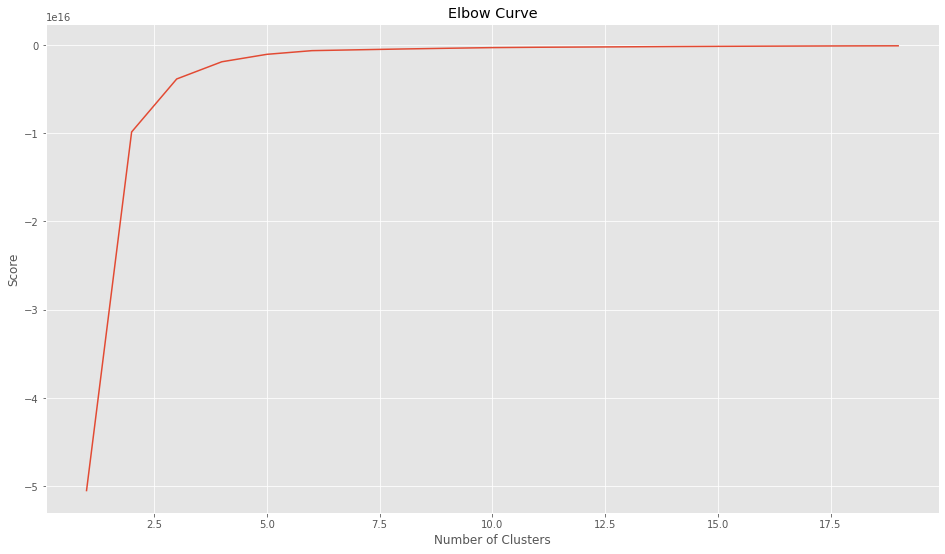

In [14]:
'''
Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que 
comentábamos antes. Este es nuestro resultado:
'''
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [18]:
'''
Ejecutamos K-Means
Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids.
'''
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.62123806e+04 2.18009121e+03 1.55466387e+04]
 [4.52857518e+06 4.74606383e+02 2.90532270e+03]
 [1.30086912e+07 2.19937888e+02 8.03913043e+01]
 [1.49737634e+06 1.25520724e+03 4.73517978e+03]
 [7.23356640e+06 9.89986441e+02 2.55654915e+03]]


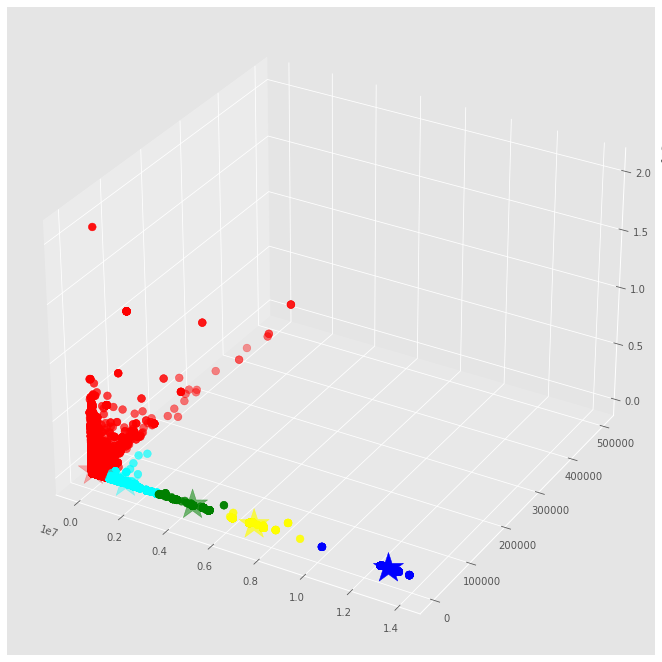

In [19]:
'''
Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se 
diferencian: (las estrellas marcan el centro de cada cluster)
'''
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

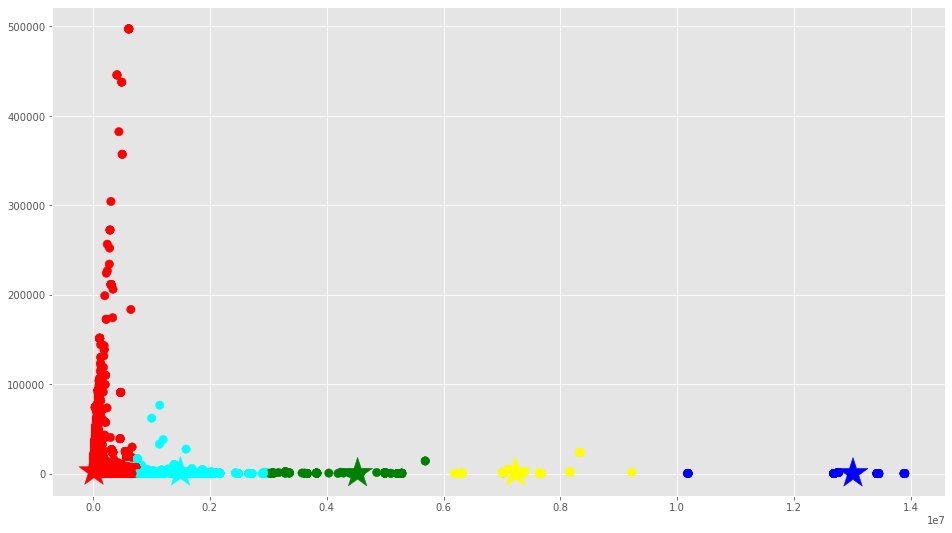

In [20]:
'''
Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 
3D para que nos ayude a visualizar los grupos y su clasificación:
'''
# Getting the values and plotting it
f1 = dataframe['user_followers'].values
f2 = dataframe['user_friends'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

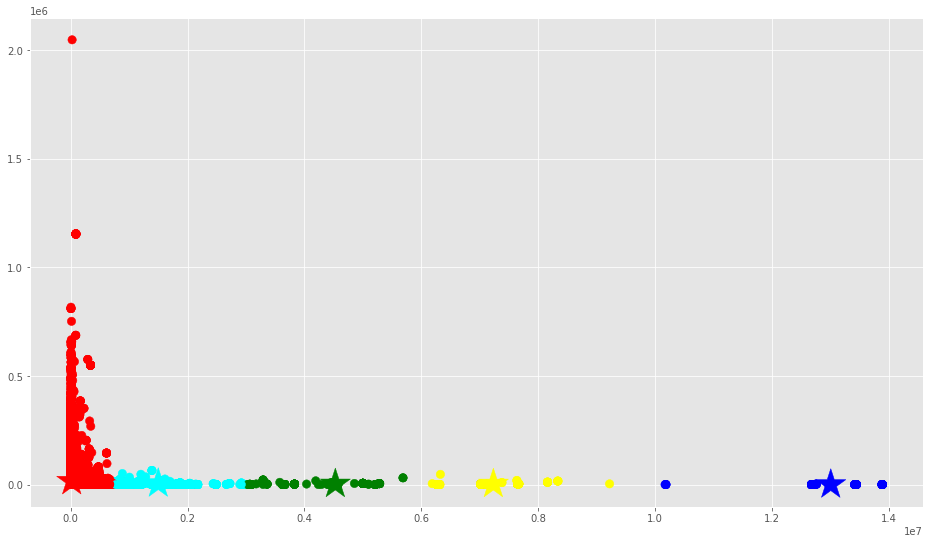

In [21]:
# Getting the values and plotting it
f1 = dataframe['user_followers'].values
f2 = dataframe['user_favourites'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

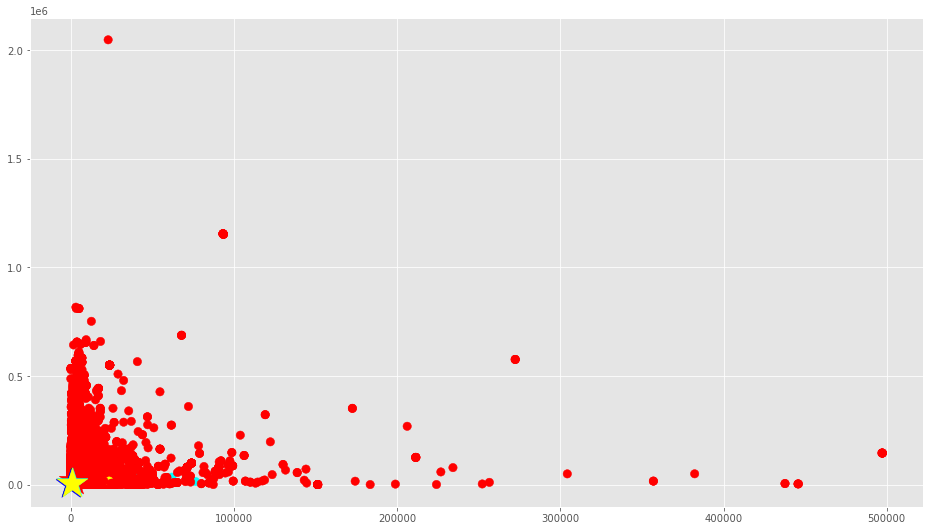

In [22]:
f1 = dataframe['user_friends'].values
f2 = dataframe['user_favourites'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [23]:
#Podemos ver cada uno de los clusters cuantos usuarios tiene:
copy =  pd.DataFrame()
copy['user_name']=dataframe['user_name'].values
copy['user_verified']=dataframe['user_verified'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,72897
1,green,282
2,blue,161
3,cyan,801
4,yellow,295


In [25]:
'''
Y podemos ver la diversidad en rubros laborales de cada uno. Por ejemplo en el grupo 0 (rojo), 
vemos que hay de todas las actividades laborales aunque predominan de actividad 1 y 2 correspondiente 
a Actores y Cantantes con 11 y 15 famosos.
'''
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['user_verified']=["False","True"]
diversidadGrupo['cantidad']=group_referrals.groupby('user_verified').size()
diversidadGrupo

,user_verified,cantidad
0,False,65069
1,True,7828


In [26]:
'''
Buscaremos los usuarios que están más cerca a los centroids de cada grupo que podríamos decir 
que tienen los rasgos de personalidad característicos que representan a cada cluster:
'''
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([33916, 32871, 70675, 69690, 21017], dtype=int64)

In [27]:
users=dataframe['user_name'].values
for row in closest:
    print(users[row])

World Urban Campaign
ANI
The Times Of India
Digital India
People's Daily, China


In [28]:
'''
Y finalmente podemos agrupar y etiquetar nuevos usuarios twitter con sus características y 
clasificarlos. Vemos el ejemplo con el usuario de David Guetta y nos devuelve que pertenece al grupo 1 (verde).
'''
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]
